In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2023-11-17 23:23:29.201644: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 23:23:29.786674: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 23:23:29.797035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 23:23:31.693726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Configurações de Exibição das imagens

In [2]:
plt.rc(
    'figure',
    autolayout=True
)

plt.rc(
    'axes', 
    labelweight='bold', 
    labelsize='large',
    titleweight='bold', 
    titlesize=18,
    titlepad=10
)

plt.rc(
    'image',
    cmap='magma'
)

tf.config.run_functions_eagerly(True)

# Aplicar Transformação de Tom de Cinza na Imagem

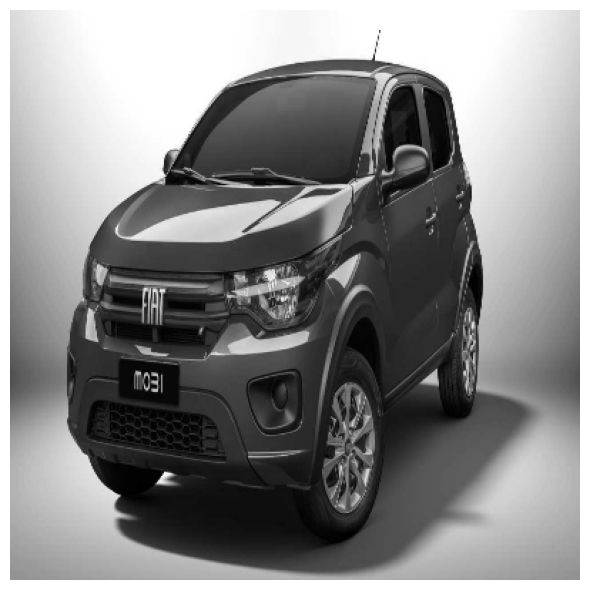

In [3]:
image_path = './carro.jpg'

image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

np_image = tf.squeeze(image).numpy()
plt.figure(figsize=(6, 6))
plt.imshow(np_image, cmap='gray')
plt.axis('off')
plt.show()

# Definir um Kernel para Aplicar na Imagem

Alguns kernels comuns de se utilizar:
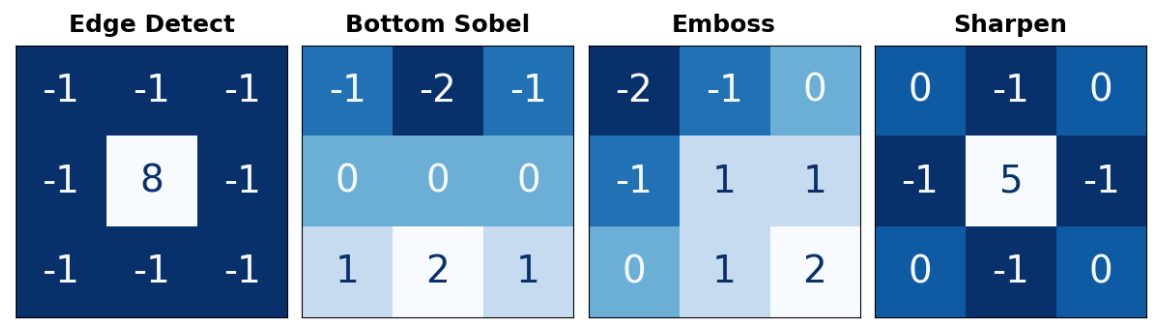

In [7]:
edge_detect_kernel = tf.constant([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])

# Aplicar Kernel na Imagem

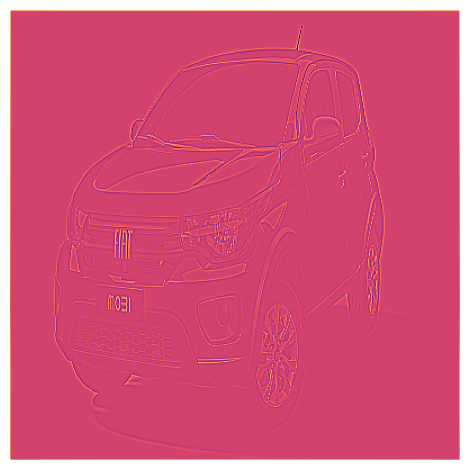

In [9]:
# Reformatar formato da imagem para compatibilidade com a função
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
edge_detect_kernel = tf.reshape(edge_detect_kernel, [*edge_detect_kernel.shape, 1, 1])
edge_detect_kernel = tf.cast(edge_detect_kernel, dtype=tf.float32)

image_filter = tf.nn.conv2d(
    input=image,
    filters=edge_detect_kernel,
    strides=1,
    padding='SAME',
)

plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

# Aplicar ReLU na imagem

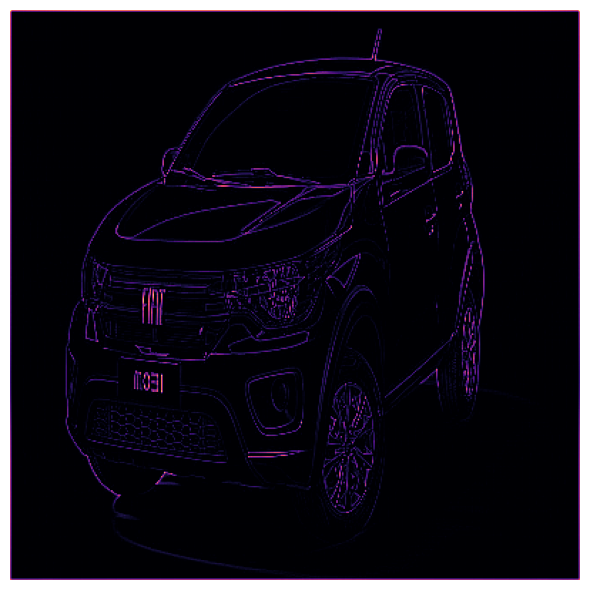

In [11]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()